In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [17]:
torch.manual_seed(42)

In [18]:
df=pd.read_csv("/content/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


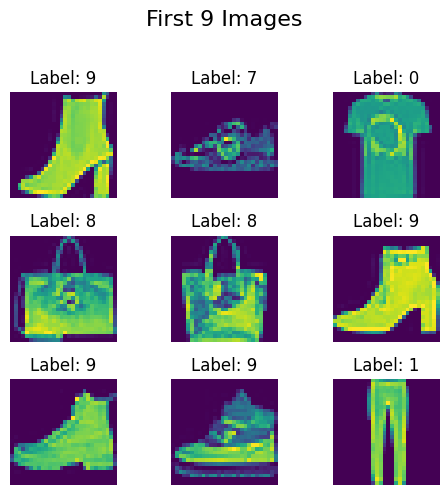

In [19]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
fig.suptitle("First 9 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [24]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [31]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [32]:
#create tr_dataset obj
tr_ds=CustomDataset(X_train,y_train)

In [ ]:
tr_ds[0]

In [34]:
test_dataset = CustomDataset(X_test, y_test)

In [36]:
# create train and test loader
train_loader = DataLoader(tr_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [37]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [38]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [40]:
model=MyNN(X_train.shape[1])
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [41]:
len(train_loader)

150

In [43]:
#training loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:
    # forwaard pass
    out=model(batch_features)

    # cal loss
    loss=criterion(out, batch_labels)

     # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.3467468428611755
Epoch: 2 , Loss: 0.7946568600336711
Epoch: 3 , Loss: 0.6597946327924729
Epoch: 4 , Loss: 0.5917230465014776
Epoch: 5 , Loss: 0.5422544613480568
Epoch: 6 , Loss: 0.505307299097379
Epoch: 7 , Loss: 0.4887121493617694
Epoch: 8 , Loss: 0.4546593451499939
Epoch: 9 , Loss: 0.4297985199093819
Epoch: 10 , Loss: 0.410716270506382
Epoch: 11 , Loss: 0.38816908140977224
Epoch: 12 , Loss: 0.37619189351797105
Epoch: 13 , Loss: 0.35680926034847893
Epoch: 14 , Loss: 0.3475659940640132
Epoch: 15 , Loss: 0.3230845755835374
Epoch: 16 , Loss: 0.3175072146455447
Epoch: 17 , Loss: 0.3112651005884012
Epoch: 18 , Loss: 0.2947062185406685
Epoch: 19 , Loss: 0.28676796273638805
Epoch: 20 , Loss: 0.27523303573330243
Epoch: 21 , Loss: 0.27079951477547487
Epoch: 22 , Loss: 0.2552324590831995
Epoch: 23 , Loss: 0.25876780912280084
Epoch: 24 , Loss: 0.24003398105502127
Epoch: 25 , Loss: 0.22667195407052834
Epoch: 26 , Loss: 0.22980353596309822
Epoch: 27 , Loss: 0.22390552471081415
E

In [44]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [45]:
# eva code
total=0
correct=0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    out=model(batch_features)
    _, predicted=torch.max(out,1)
    total=total+batch_labels.shape[0]
    correct=correct+(predicted==batch_labels).sum().item()
print(correct/total)


0.835
